# Liana Cellphone

In [1]:
import scanpy as sc
import scvi
from matplotlib import rcParams
import matplotlib.pyplot as plt
from liana.method import cellphonedb

folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/concat/"

In [2]:
# adata = sc.read(folder_path + "adata_annotated.h5ad")
adata = sc.read(folder_path + "adata_subset.h5ad")

램 부족으로 인해 특정 cell type만 추출해서 써야 함.

In [3]:
# adata_subset = sc.pp.subsample(adata, fraction = 0.1, copy = True)
# adata_subset.write_h5ad(folder_path + "adata_subset.h5ad")

In [20]:
liana_result = cellphonedb(
    adata,
    groupby = "cell_type",
    use_raw = False,
    return_all_lrs = True,
    layer = 'scvi_normalized',
    # layer = 'counts',
    verbose = True,
    inplace = False
)

# cellphonedb(
#     adata,
#     groupby = "cell_type",
#     use_raw = False,
#     return_all_lrs = True,
#     layer = 'scvi_normalized',
#     # layer = 'counts',
#     verbose = True,
#     inplace = True
# )



# samplingg 0.2로 해서 94 sample 돌리면 약 13분

Using the `scvi_normalized` layer!
Converting to sparse csr matrix!
c:\Users\heung\anaconda3\Lib\site-packages\anndata\_core\anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
c:\Users\heung\anaconda3\Lib\site-packages\liana\method\_pipe_utils\_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
['BMS1P4_2', 'POLR2J3_2', 'POLR2J4_2', 'RF00003_10', 'RF00003_11', 'RF00003_12', 'RF00003_3', 'RF00003_4', 'RF00003_5', 'RF00003_8', 'RF00003_9', 'RF00004_10', 'RF00012_44', 'RF00017_107', 'RF00017_124', 'RF00017_57', 'RF00017_87', 'RF00019_121', 'RF00019_164', 'RF00019_192', 'RF00019_206', 'RF00019_226', 'RF00019_332', 'RF00019_363', 'RF00019_406', 'RF00019_419', 'RF00019_439', 'RF00019_46', 'RF00019_52', 'RF00019_566', 'RF00019_568', 'RF00019_626', 'RF00

Generating ligand-receptor stats for 27830 samples and 1689 features


c:\Users\heung\anaconda3\Lib\site-packages\liana\resource\_reassemble_complexes.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


c:\Users\heung\anaconda3\Lib\site-packages\liana\resource\_reassemble_complexes.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

---
# heat map

In [ ]:
liana_result[liana_result['receptor'].isin(['VSIR'])]

In [21]:
liana_result

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lrs_to_keep,lr_means,cellphone_pvals
246707,B2M,B2M,2.867040e-03,1.0,KLRD1,KLRD1,9.312638e-04,1.0,NK cells,NK cells,True,1.899152e-03,0.0
242602,B2M,B2M,2.689866e-03,1.0,KLRD1,KLRD1,9.312638e-04,1.0,T cells,NK cells,True,1.810565e-03,0.0
267232,B2M,B2M,2.320266e-03,1.0,KLRD1,KLRD1,9.312638e-04,1.0,Etc.,NK cells,True,1.625765e-03,0.0
201552,B2M,B2M,2.867040e-03,1.0,KLRD1,KLRD1,1.870167e-04,1.0,NK cells,T cells,True,1.527028e-03,0.0
246702,B2M,B2M,2.867040e-03,1.0,KLRC1,KLRC1,1.198820e-04,1.0,NK cells,NK cells,True,1.493461e-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248746,SST,SST,1.067704e-08,1.0,SSTR1,SSTR1,9.541558e-09,1.0,NK cells,NK cells,True,1.010930e-08,1.0
473609,PPY,PPY,1.290673e-08,1.0,NPY2R,NPY2R,7.163340e-09,1.0,NK cells,Etc.,True,1.003503e-08,1.0
429886,GALP,GALP,8.086642e-09,1.0,GALR2,GALR2,1.068524e-08,1.0,NK cells,Neurons,True,9.385943e-09,1.0
263080,EFNA4,EFNA4,6.373202e-09,1.0,EPHA8,EPHA8,1.238825e-08,1.0,Neurons,NK cells,True,9.380726e-09,1.0


In [22]:
import pandas as pd
df = pd.DataFrame()
df

""


In [23]:
cells = liana_result['source'].unique().tolist()

In [24]:
new_columns = [f'{x}|{y}' for x in cells for y in cells]
for col in new_columns:
    df[col] = pd.NA

C:\Users\heung\AppData\Local\Temp\ipykernel_35592\169824832.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\heung\AppData\Local\Temp\ipykernel_35592\169824832.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\heung\AppData\Local\Temp\ipykernel_35592\169824832.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

In [ ]:
df

In [25]:
liana_result['ligand-receptor'] = liana_result['ligand'] + '_' + liana_result['receptor']

In [26]:
for col in new_columns:
    source, target = col.split('|')
    filtered_values = liana_result[(liana_result['source'] == source) & (liana_result['target'] == target)]
    if not filtered_values.empty:
        for _, row in filtered_values.iterrows():
            ligand_receptor = row['ligand-receptor']
            cellphone_pval = row['cellphone_pvals']
            
            if ligand_receptor not in df.index:
                # 'ligand-receptor'를 split하여 gene_a, gene_b로 나눔.
                gene_a, gene_b = ligand_receptor.split('_')
                # 열에 추가
                df.loc[ligand_receptor, 'interacting_pair'] = ligand_receptor
                df.loc[ligand_receptor, 'gene_a'] = gene_a
                df.loc[ligand_receptor, 'gene_b'] = gene_b
                
                df.loc[ligand_receptor, new_columns] = pd.NA
                
            df.at[ligand_receptor, col] = cellphone_pval
# run time: 

C:\Users\heung\AppData\Local\Temp\ipykernel_35592\435620621.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\heung\AppData\Local\Temp\ipykernel_35592\435620621.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\heung\AppData\Local\Temp\ipykernel_35592\435620621.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame

In [27]:
df

,NK cells|NK cells,NK cells|T cells,NK cells|Etc.,NK cells|Oligodendrocytes,NK cells|Neurons,NK cells|Endothelial cells,NK cells|Malignant cells,NK cells|Fibroblasts,NK cells|Monocytic cells 2,NK cells|Microglia,...,Monocytic cells|Neurons,Monocytic cells|Endothelial cells,Monocytic cells|Malignant cells,Monocytic cells|Fibroblasts,Monocytic cells|Monocytic cells 2,Monocytic cells|Microglia,Monocytic cells|Monocytic cells,interacting_pair,gene_a,gene_b
B2M_KLRD1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B2M_KLRD1,B2M,KLRD1
B2M_KLRC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B2M_KLRC1,B2M,KLRC1
B2M_KIR2DL3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B2M_KIR2DL3,B2M,KIR2DL3
B2M_KLRC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B2M_KLRC2,B2M,KLRC2
B2M_KIR2DL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B2M_KIR2DL1,B2M,KIR2DL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INSL5_RXFP2,1.0,1.0,1.0,0.0,0.0,0.996,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,INSL5_RXFP2,INSL5,RXFP2
CEACAM16_TECTB,1.0,1.0,1.0,0.0,0.997,1.0,1.0,1.0,1.0,1.0,...,0.986,1.0,1.0,1.0,1.0,1.0,1.0,CEACAM16_TECTB,CEACAM16,TECTB
GCG_GCGR,1.0,1.0,1.0,1.0,0.981,1.0,0.642,1.0,1.0,1.0,...,1.0,1.0,0.999,1.0,1.0,1.0,1.0,GCG_GCGR,GCG,GCGR
PROK1_PROKR1,1.0,1.0,1.0,1.0,0.619,1.0,0.034,1.0,0.952,1.0,...,0.5,1.0,0.0,1.0,0.938,1.0,1.0,PROK1_PROKR1,PROK1,PROKR1


In [28]:
cols_to_move = ['interacting_pair', 'gene_a', 'gene_b']
columns = cols_to_move + [col for col in df.columns if col not in cols_to_move]
df = df[columns]

In [29]:
df.to_excel(folder_path + 'cellphonedb_result.xlsx')

In [38]:
df

,interacting_pair,gene_a,gene_b,NK cells|NK cells,NK cells|T cells,NK cells|Etc.,NK cells|Oligodendrocytes,NK cells|Neurons,NK cells|Endothelial cells,NK cells|Malignant cells,...,Monocytic cells|T cells,Monocytic cells|Etc.,Monocytic cells|Oligodendrocytes,Monocytic cells|Neurons,Monocytic cells|Endothelial cells,Monocytic cells|Malignant cells,Monocytic cells|Fibroblasts,Monocytic cells|Monocytic cells 2,Monocytic cells|Microglia,Monocytic cells|Monocytic cells
B2M_KLRD1,B2M_KLRD1,B2M,KLRD1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B2M_KLRC1,B2M_KLRC1,B2M,KLRC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B2M_KIR2DL3,B2M_KIR2DL3,B2M,KIR2DL3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B2M_KLRC2,B2M_KLRC2,B2M,KLRC2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B2M_KIR2DL1,B2M_KIR2DL1,B2M,KIR2DL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INSL5_RXFP2,INSL5_RXFP2,INSL5,RXFP2,1.0,1.0,1.0,0.0,0.0,0.996,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
CEACAM16_TECTB,CEACAM16_TECTB,CEACAM16,TECTB,1.0,1.0,1.0,0.0,0.997,1.0,1.0,...,1.0,1.0,0.0,0.986,1.0,1.0,1.0,1.0,1.0,1.0
GCG_GCGR,GCG_GCGR,GCG,GCGR,1.0,1.0,1.0,1.0,0.981,1.0,0.642,...,1.0,1.0,1.0,1.0,1.0,0.999,1.0,1.0,1.0,1.0
PROK1_PROKR1,PROK1_PROKR1,PROK1,PROKR1,1.0,1.0,1.0,1.0,0.619,1.0,0.034,...,1.0,1.0,1.0,0.5,1.0,0.0,1.0,0.938,1.0,1.0


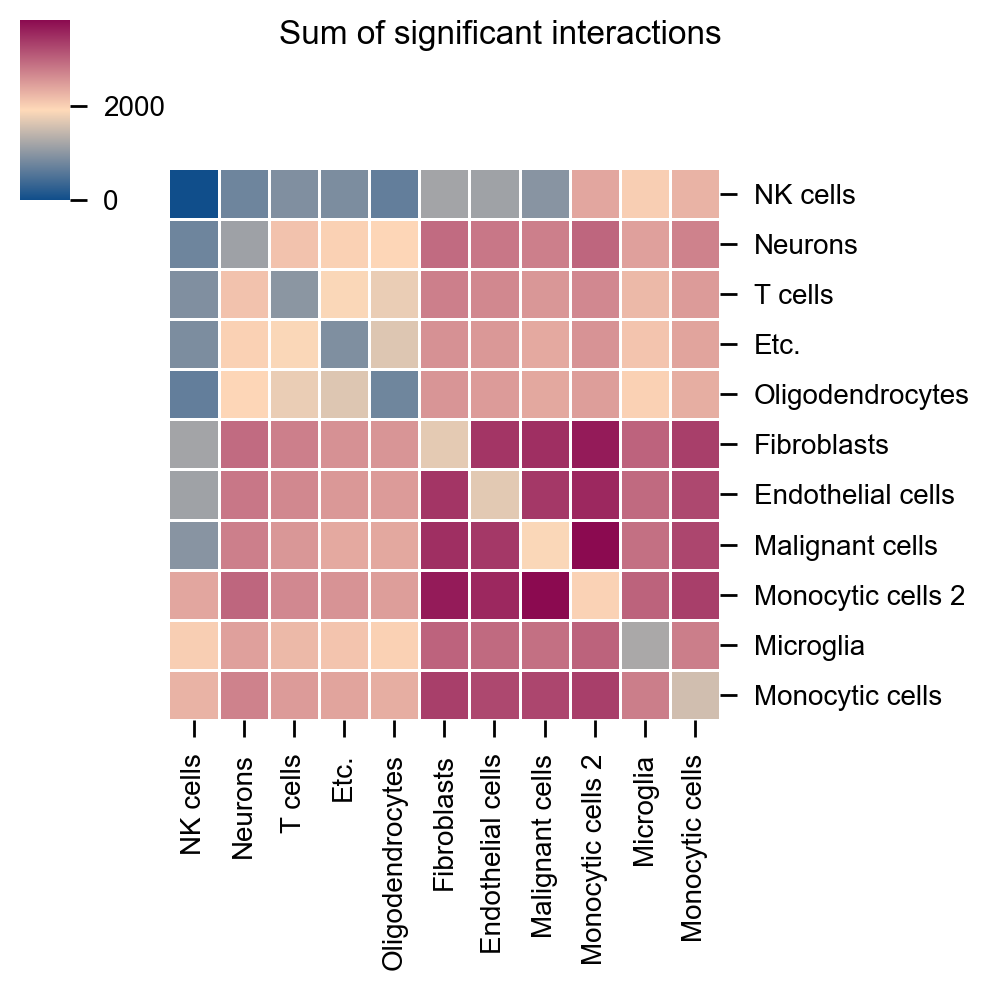

In [47]:
import ktplotspy as kpy
%matplotlib inline
p = kpy.plot_cpdb_heatmap(
    pvals = df,
    degs_analysis = False,
    figsize = (5, 5),
    title = "Sum of significant interactions",
)

In [45]:
p

In [32]:
ic_list = ['CD27', 'CD28', 'CD40', 'IL2RB', 'TNFRSF9', 'TNFRSF4', 'TNFRSF18', 'ICOS',
            'ADORA2A', 'ADORA2B', 'CD276' 'VTCN1', 'BTLA', 'CTLA4', 'IDO1', 'KIR3DL1', 'NOX2', 'PDCD1', 'CD274', 'PDCD1LG2', 'HAVCR2', 'VSIR', 'SIGLEC7', 'SIGLEC9']

In [33]:
filtered_df = df[df['gene_a'].isin(ic_list) | df['gene_b'].isin(ic_list)]
filtered_df.shape

(51, 124)

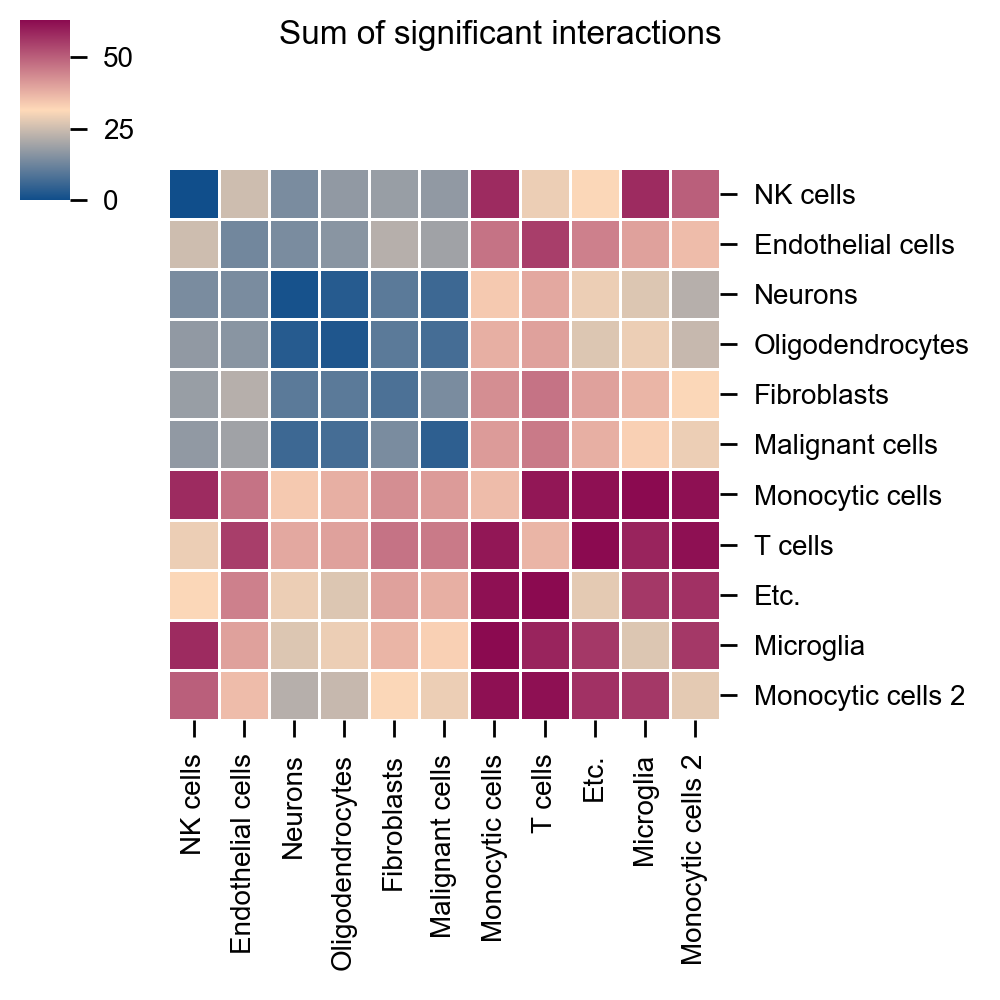

In [48]:
import ktplotspy as kpy

kpy.plot_cpdb_heatmap(
    pvals = filtered_df,
    degs_analysis = False,
    figsize = (5, 5),
    title = "Sum of significant interactions"
)

In [ ]:
liana_result = liana_result.drop(columns = ['ligand-receptor'])

---

c:\Users\heung\anaconda3\Lib\site-packages\liana\plotting\_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


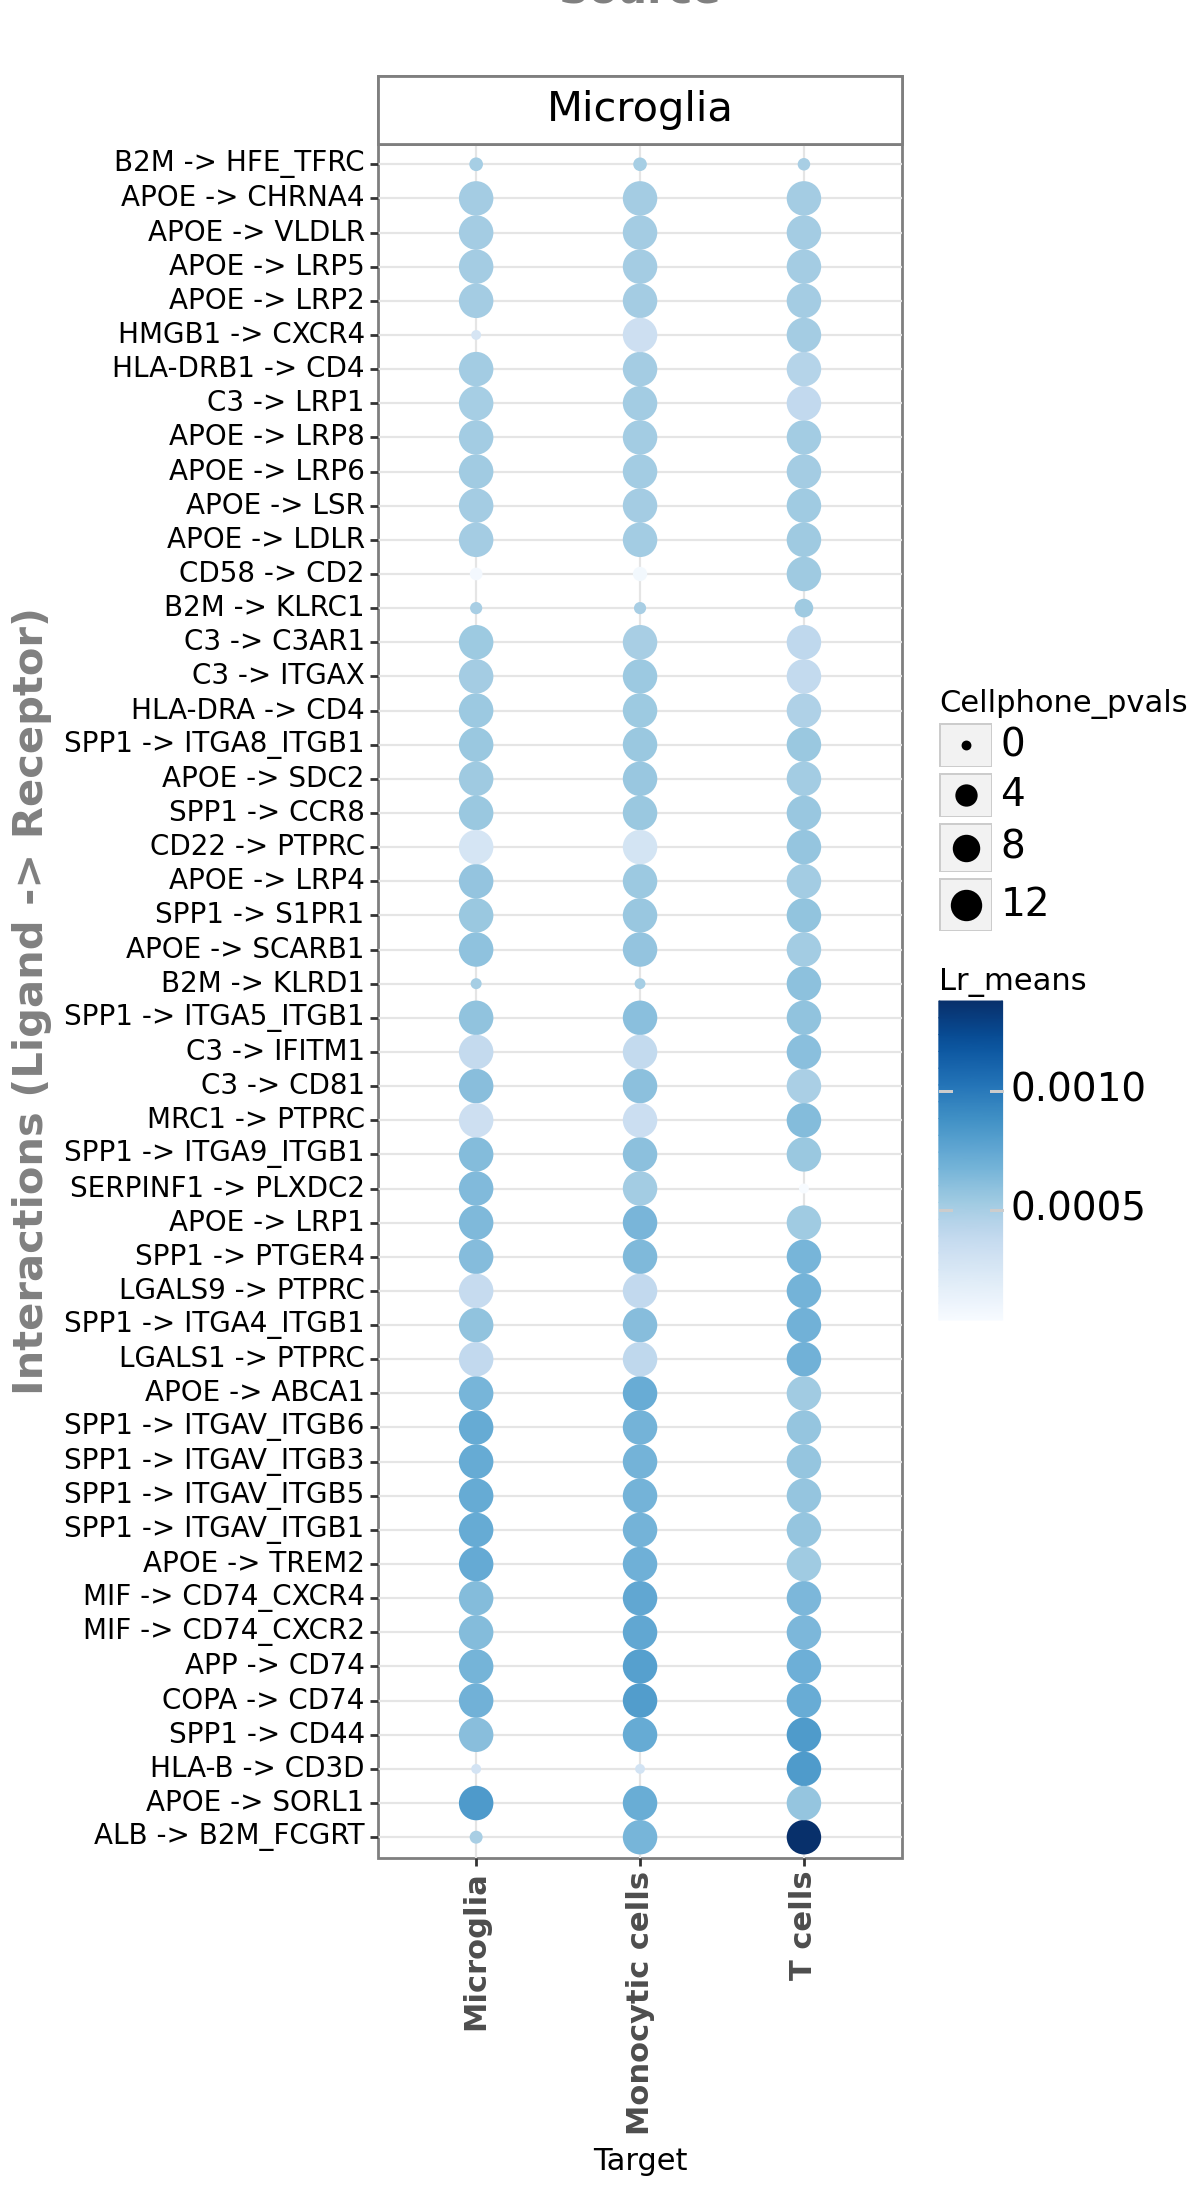

<Figure Size: (600 x 1100)>

In [17]:
import liana as li
li.pl.dotplot(
    adata = adata,
    # liana_res = liana_result,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size = True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=['Microglia'],

    target_labels=['Microglia', 'Monocytic cells', 'T cells'],

    # since cpdbv2 suggests using a filter to FPs
    # we can filter the interactions according to p-values <= 0.01
    # filterby = "cellphone_pvals",
    # filter_lambda=lambda x: x <= 0.01,
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby = "lr_means",
    orderby_ascending = False,  # we want to prioritize those with highest expression
    # receptor_complex = ['VSIR', 'PDCD1', 'CTLA4', 'TIGIT', 'HAVCR2', 'LAG3', 'BTLA', 'CD40', 'CD28', 'TNFRSF4', 'TNFRSF18', 'ICOS', 'CD274', 'PDCD1LG2'],
    # ligand_complex = ['IGSF1', 'CD101', 'IGSF3', 'CADM1', 'IGSF5', 'IGSF6', 'IGSF8', 'IGSF9', 'IGSF9B', 'IGSF10', 'IGSF11', 'IGSF21', 'IGSF22'],
    top_n = 50,  # and we want to keep only the top 20 interactions
    figure_size=(6, 11),
    size_range=(1, 6),
    cmap = 'Blues'
)

In [ ]:
adata

In [8]:
ic_list = ['CD27', 'CD28', 'CD40', 'IL2RB', 'TNFRSF9', 'TNFRSF4', 'TNFRSF18', 'TNFRS14', 'ICOS',
            'ADORA2A', 'ADORA2B', 'CD276' 'VTCN1', 'BTLA', 'CTLA4', 'IDO1', 'KIR3DL1', 'NOX2', 'PDCD1', 'PDCD2', 'CD274', 'PDCD1LG2', 'HAVCR2', 'VSIR', 'SIGLEC7', 'SIGLEC9',
            'CD86', 'CD247', 'CD80', 'RGMB', 'CD79A']

c:\Users\heung\anaconda3\Lib\site-packages\liana\plotting\_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


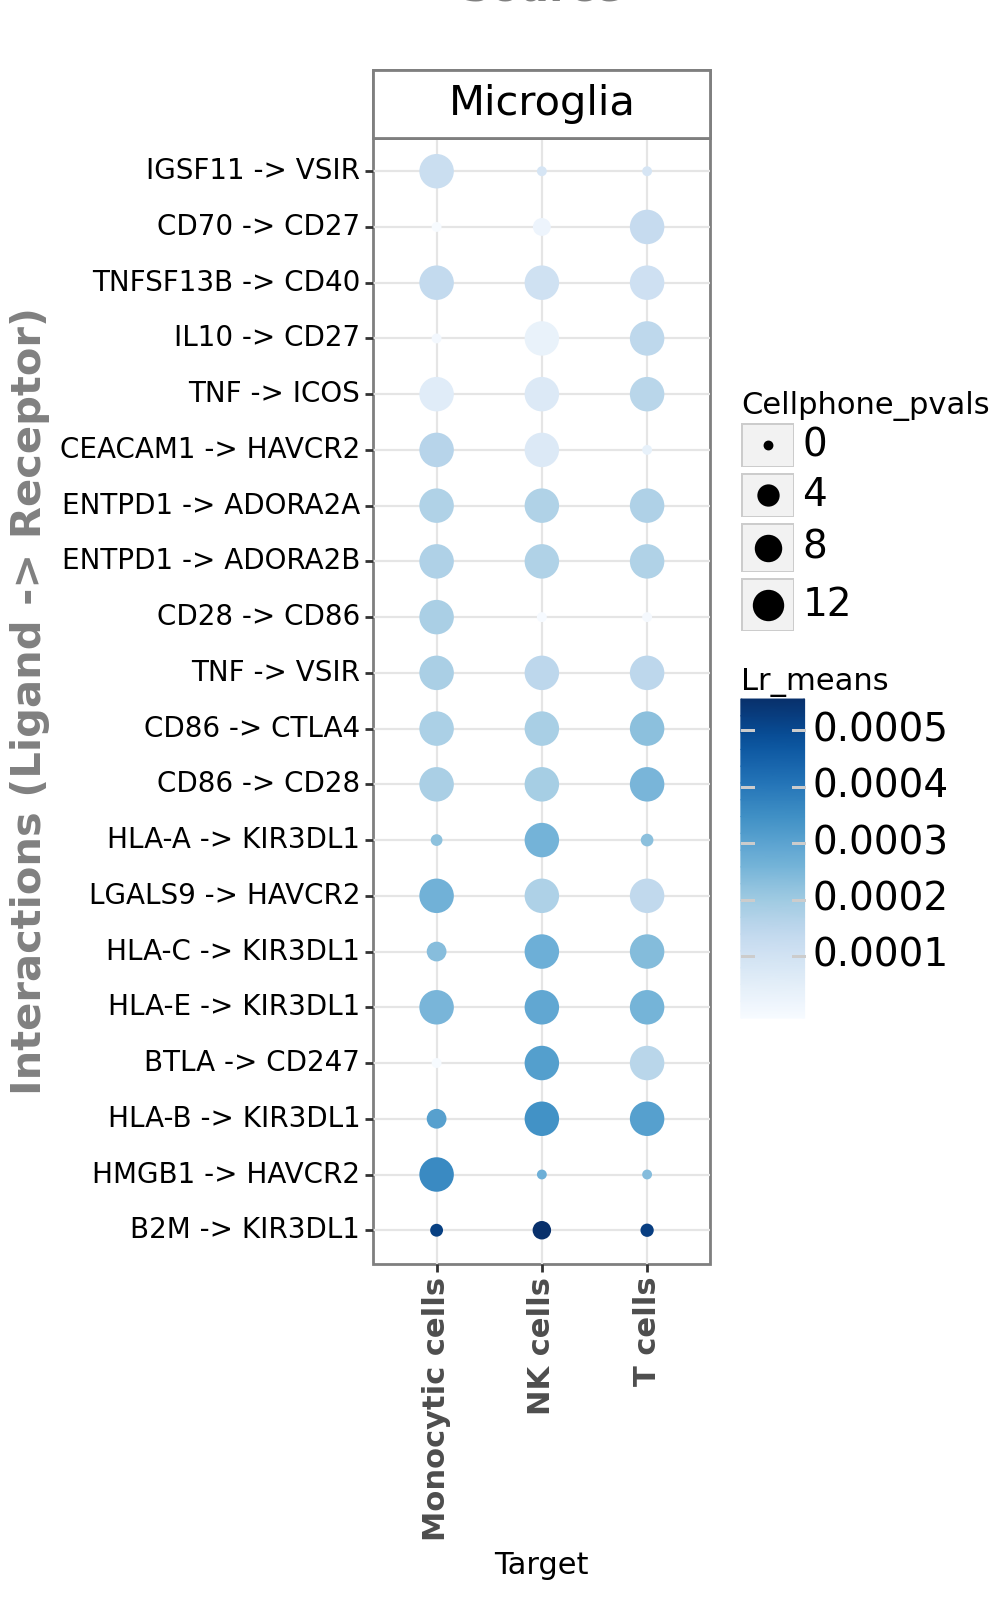

<Figure Size: (500 x 800)>

In [19]:
import liana as li
li.pl.dotplot(
    adata = adata,
    # liana_res = liana_result,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size = True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=['Microglia'],

    target_labels=['Monocytic cells', 'T cells', 'NK cells'],

    orderby = "lr_means",
    orderby_ascending = False,  # we want to prioritize those with highest expression
    receptor_complex = ic_list,
    # ligand_complex = ic_list,
    top_n = 20,  # and we want to keep only the top 20 interactions
    figure_size=(5, 8),
    size_range=(1, 6),
    cmap = 'Blues',
    
)

---

In [ ]:
adata.write_h5ad(folder_path + "adata_annotated.h5ad")